In [139]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error
from matplotlib import rc
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix

In [140]:
df_train = pd.read_csv('housing.csv')

In [141]:
df_train.dropna(axis=0,how='any',subset=['latitude','longitude'],inplace=True)

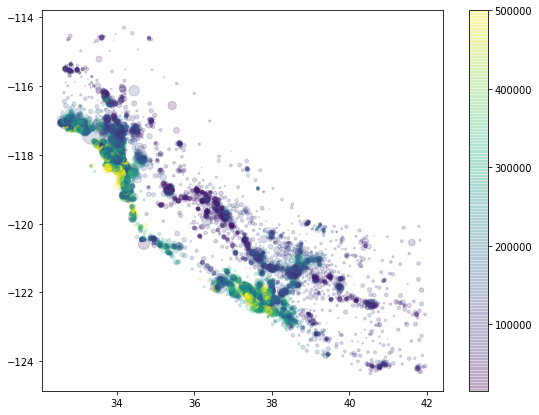

In [142]:
plt.figure(figsize = (9, 7))
plt.scatter(df_train.latitude, df_train.longitude, alpha = 0.2, c = df_train.median_house_value, s = df_train.population/100)
plt.colorbar()

#created a scatter plot with lat and lon as the x and y axis. set color on median house value, and population as the size

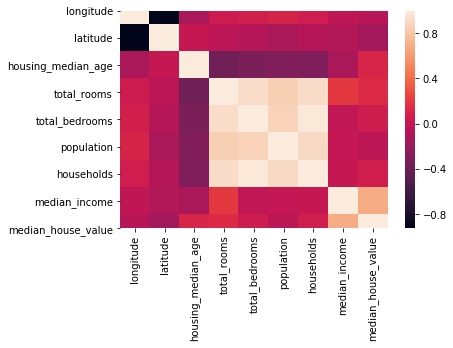

In [174]:
sns.heatmap(df_train.corr())

<function matplotlib.pyplot.show(*args, **kw)>

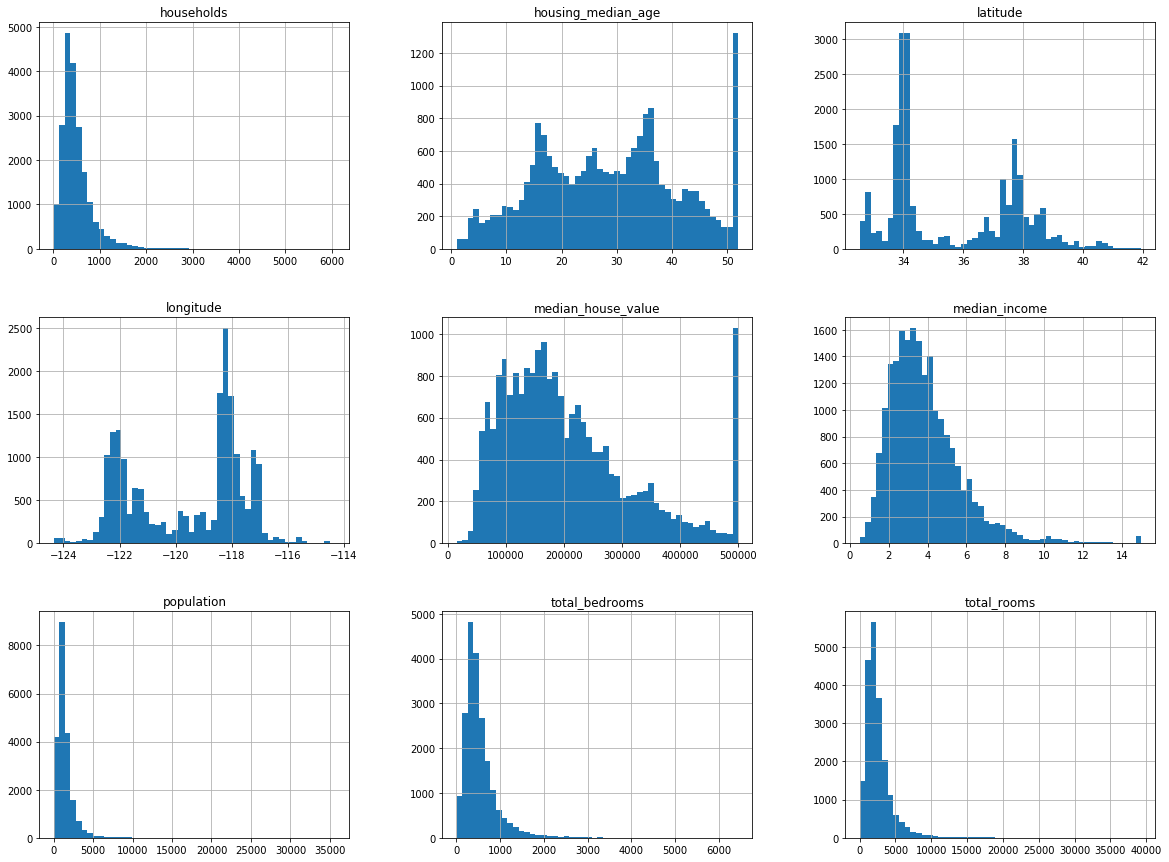

In [143]:
df_train.hist(bins=50, figsize=(20,15))
plt.show


In [144]:
y = df_train['median_house_value']
X = df_train.drop('median_house_value', axis = 1)
X['total_bedrooms'].fillna(X.total_bedrooms.median(), inplace = True)
# We have to drop median home value so we dont compare it to itself

In [145]:
X['rooms_per_house'] = X['total_rooms']/X['households']
X['bedrooms_per_rooms'] = X['total_bedrooms']/X['total_rooms']
X['population_per_household'] = X['population']/X['households']
X_train, X_test, y_train, y_test = train_test_split(X, y)
# create new columns

In [146]:
len(X_train)

15480

In [147]:
train = X_train.join(y_train)
corr_mat = train.corr()

In [148]:
corr_mat['median_house_value'].sort_values(ascending = False)
# median house value and median income are the closest correlated

median_house_value          1.000000
median_income               0.688699
rooms_per_house             0.176233
total_rooms                 0.131013
housing_median_age          0.107530
households                  0.063803
total_bedrooms              0.048312
population_per_household   -0.022328
population                 -0.025973
longitude                  -0.044700
latitude                   -0.146060
bedrooms_per_rooms         -0.242207
Name: median_house_value, dtype: float64

In [149]:
df_train_cols = train[['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002013DF38B48>,
      dtype=object)

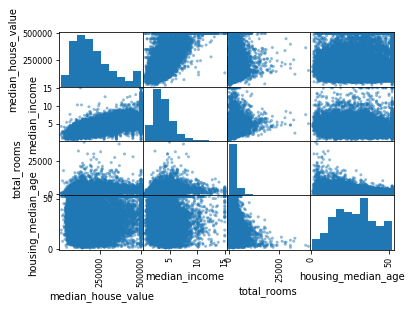

In [175]:
scatter_matrix(df_train_cols)
#needs to be scaled a bit better

In [151]:
lm = LinearRegression()
X = train['median_income'].values.reshape(-1,1)
y = train['median_house_value']
lm.fit(X,y)
predict = lm.predict(X)
mse = mean_squared_error(predict, y)
np.sqrt(mse)

#ran a basic linear regression model

83324.15640592865

In [152]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15480 entries, 19818 to 19307
Data columns (total 13 columns):
longitude                   15480 non-null float64
latitude                    15480 non-null float64
housing_median_age          15480 non-null float64
total_rooms                 15480 non-null float64
total_bedrooms              15480 non-null float64
population                  15480 non-null float64
households                  15480 non-null float64
median_income               15480 non-null float64
ocean_proximity             15480 non-null object
rooms_per_house             15480 non-null float64
bedrooms_per_rooms          15480 non-null float64
population_per_household    15480 non-null float64
median_house_value          15480 non-null float64
dtypes: float64(12), object(1)
memory usage: 2.3+ MB


In [153]:
dummies = pd.get_dummies(train['ocean_proximity'])

In [154]:
train = train.join(dummies)

In [155]:
train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'rooms_per_house', 'bedrooms_per_rooms',
       'population_per_household', 'median_house_value', '<1H OCEAN', 'INLAND',
       'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype='object')

In [156]:
train = train.drop('<1H OCEAN', axis = 1)

In [157]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15480 entries, 19818 to 19307
Data columns (total 17 columns):
longitude                   15480 non-null float64
latitude                    15480 non-null float64
housing_median_age          15480 non-null float64
total_rooms                 15480 non-null float64
total_bedrooms              15480 non-null float64
population                  15480 non-null float64
households                  15480 non-null float64
median_income               15480 non-null float64
ocean_proximity             15480 non-null object
rooms_per_house             15480 non-null float64
bedrooms_per_rooms          15480 non-null float64
population_per_household    15480 non-null float64
median_house_value          15480 non-null float64
INLAND                      15480 non-null uint8
ISLAND                      15480 non-null uint8
NEAR BAY                    15480 non-null uint8
NEAR OCEAN                  15480 non-null uint8
dtypes: float64(12), object(1

In [158]:
train = train.drop('ocean_proximity', axis = 1)

In [159]:
train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_house,bedrooms_per_rooms,population_per_household,median_house_value,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
19818,-119.30,36.57,32.0,728.0,435.0,461.0,149.0,3.0156,4.885906,0.597527,3.093960,109100.0,1,0,0,0
18874,-122.22,38.08,37.0,4590.0,857.0,2920.0,832.0,3.4360,5.516827,0.186710,3.509615,94800.0,0,0,1,0
10034,-121.08,39.21,17.0,3033.0,590.0,1319.0,583.0,2.4811,5.202401,0.194527,2.262436,111800.0,1,0,0,0
16658,-120.66,35.26,15.0,5540.0,1319.0,2383.0,1165.0,2.2656,4.755365,0.238087,2.045494,226200.0,0,0,0,1
11485,-117.99,33.72,26.0,1787.0,275.0,801.0,270.0,5.5514,6.618519,0.153889,2.966667,255700.0,0,0,0,0


In [160]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15480 entries, 19818 to 19307
Data columns (total 16 columns):
longitude                   15480 non-null float64
latitude                    15480 non-null float64
housing_median_age          15480 non-null float64
total_rooms                 15480 non-null float64
total_bedrooms              15480 non-null float64
population                  15480 non-null float64
households                  15480 non-null float64
median_income               15480 non-null float64
rooms_per_house             15480 non-null float64
bedrooms_per_rooms          15480 non-null float64
population_per_household    15480 non-null float64
median_house_value          15480 non-null float64
INLAND                      15480 non-null uint8
ISLAND                      15480 non-null uint8
NEAR BAY                    15480 non-null uint8
NEAR OCEAN                  15480 non-null uint8
dtypes: float64(12), uint8(4)
memory usage: 2.2 MB


In [161]:
y = train['median_house_value']
X = train.drop('median_house_value', axis = 1)

In [162]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [163]:
from sklearn.pipeline import Pipeline

In [164]:
pipeline =  Pipeline([('std_scaler', StandardScaler()),
                     ('poly_features', PolynomialFeatures(degree = 2))])

In [165]:
housing_prepared = pipeline.fit_transform(X)

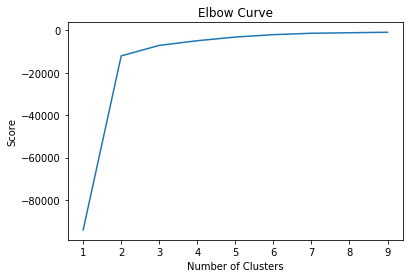

In [166]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = df_train[['latitude']]
X_axis = df_train[['longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [167]:
kmeans = KMeans(n_clusters = 7, init ='k-means++')
kmeans.fit(X[X.columns[1:3]]) # Compute k-means clustering.
X['cluster_label'] = kmeans.fit_predict(X[X.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(X[X.columns[1:3]]) # Labels of each point
X.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_house,bedrooms_per_rooms,population_per_household,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,cluster_label
19818,-119.30,36.57,32.0,728.0,435.0,461.0,149.0,3.0156,4.885906,0.597527,3.093960,1,0,0,0,3
18874,-122.22,38.08,37.0,4590.0,857.0,2920.0,832.0,3.4360,5.516827,0.186710,3.509615,0,0,1,0,3
10034,-121.08,39.21,17.0,3033.0,590.0,1319.0,583.0,2.4811,5.202401,0.194527,2.262436,1,0,0,0,6
16658,-120.66,35.26,15.0,5540.0,1319.0,2383.0,1165.0,2.2656,4.755365,0.238087,2.045494,0,0,0,1,6
11485,-117.99,33.72,26.0,1787.0,275.0,801.0,270.0,5.5514,6.618519,0.153889,2.966667,0,0,0,0,4
17178,-122.47,37.51,15.0,4974.0,764.0,2222.0,774.0,6.7606,6.426357,0.153599,2.870801,0,0,0,1,6
13685,-117.24,34.15,26.0,2041.0,293.0,936.0,375.0,6.0000,5.442667,0.143557,2.496000,1,0,0,0,4
11077,-117.85,33.80,34.0,1593.0,283.0,872.0,255.0,3.8250,6.247059,0.177652,3.419608,0,0,0,0,3
2036,-119.69,36.75,6.0,1926.0,303.0,965.0,316.0,4.7463,6.094937,0.157321,3.053797,1,0,0,0,1
247,-122.22,37.77,40.0,494.0,114.0,547.0,135.0,2.8015,3.659259,0.230769,4.051852,0,0,1,0,0
